### 3. NLP & Modeling

In [3]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import spacy
import re
import string
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, RocCurveDisplay
from textblob import TextBlob

In [4]:
final = pd.read_csv('updated_combined_FINAL.csv')

In [9]:
final['Selftext'].fillna('', inplace=True)

## Finding our Baseline score using Target as our y variables

In [10]:
X = final['Selftext']
y = final['Target']

In [11]:
y.value_counts(normalize = True)

0    0.50262
1    0.49738
Name: Target, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a dummy classifier that predicts the majority class (0 or 1)
dummy_classifier = DummyClassifier(strategy='most_frequent')

In [15]:
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [16]:
# Make predictions on the test data using the dummy classifier
y_pred = dummy_classifier.predict(X_test)

In [11]:
# Calculate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred)

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.4868263473053892


**Baseline accuracy is close to (50%), indicating that the task of predicting the 'Target' column might be challenging using a simple majority class prediction. To improve the performance we need to consider using more advanced machine learning models or techniques to capture more meaningful patterns in the data**

In [12]:
#Solid amount of rows/posts to use
final.shape

(6679, 7)

In [42]:
vectorizer = CountVectorizer(stop_words='english')

In [43]:
X = vectorizer.fit_transform(final['Selftext'])

In [19]:
feature_names = vectorizer.get_feature_names_out()

In [117]:
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'anyone', 'behind', 'even', 'beyond', 'himself', 'mostly', 'off', 'twelve', 'rather', 'see', 'last', 'thereafter', 'indeed', 'keep', 'were', 'bottom', 'still', 'becoming', 'then', 'could', 'un', 'co', 'sometime', 'please', 'nevertheless', 'besides', 'whereby', 'hereafter', 'twenty', 'system', 'seems', 'somehow', 'else', 'thereupon', 'hereby', 'nowhere', 'into', 'several', 'part', 'onto', 'ie', 'side', 'only', 'former', 'noone', 'us', 'about', 'without', 're', 'found', 'after', 'bill', 'where', 'for', 'few', 'take', 'his', 'perhaps', 'above', 'might', 'beside', 'six', 'wherever', 'amongst', 'was', 'thin', 'give', 'latterly', 'or', 'beforehand', 'most', 'me', 'a', 'being', 'per', 'well', 'became', 'i', 'herself', 'too', 'also', 'itself', 'we', 'who', 'either', 'whereas', 'over', 'every', 'yet', 'what', 'whole', 'been', 'nothing', 'cry', 'can', 'otherwise', 'not', 'many', 'again', 'thus', 'others', 'yourself', 'less', 'hers', 'couldnt', 'call', 'describe', 'and', 'here', 'since

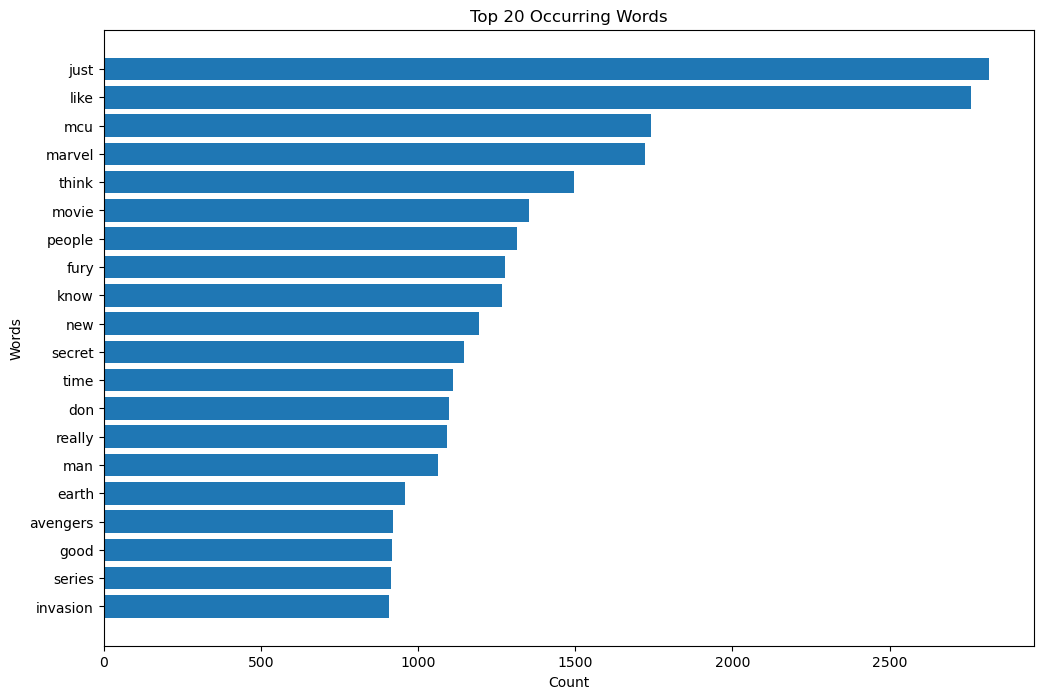

In [44]:
word_counts = np.array(X.sum(axis=0)).squeeze()

# DataFrame to hold the feature names and their corresponding counts
features_df = pd.DataFrame({'Feature': feature_names, 'Count': word_counts})

sorted_features_df = features_df.sort_values(by='Count', ascending=False)

# Plotting the top occurring words
top_n = 20  
plt.figure(figsize=(12, 8))
plt.barh(sorted_features_df['Feature'][:top_n], sorted_features_df['Count'][:top_n])
plt.xlabel('Count')
plt.ylabel('Words')
plt.title(f'Top {top_n} Occurring Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common word on top
plt.show()

In [45]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1, 2))

In [46]:
X_train_tfidf = cvec.fit_transform(X_train)

In [47]:
X_train_df = pd.DataFrame(X_train_tfidf.todense(), columns=cvec.get_feature_names_out())

In [49]:
word_counts = X_train_df.sum()

top_fifteen = word_counts.sort_values(ascending = False).head(15)

print(top_fifteen)

just      2074
like      2016
mcu       1271
marvel    1264
think     1094
fury      1019
people     977
movie      976
know       946
new        876
secret     862
time       821
man        811
don        808
really     793
dtype: int64


In [52]:
X_train_counts = cvec.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_counts.todense(), columns=cvec.get_feature_names_out())

# Step 3: Get the word counts and find the top fifteen words
word_counts = X_train_counts.sum(axis=0)
word_counts = word_counts.A1  # Convert the sparse matrix to a 1-dimensional array
feature_names = cvec.get_feature_names_out()
top_fifteen_indices = word_counts.argsort()[::-1][:15]
top_fifteen_words = [feature_names[idx] for idx in top_fifteen_indices]

# Step 4: Calculate and print the TF-IDF coefficients for the top fifteen words
tfidf_values_top_fifteen = [X_train_df[word].mean() for word in top_fifteen_words]

print("Top fifteen words and their corresponding TF-IDF coefficients:")
for word, coef in zip(top_fifteen_words, tfidf_values_top_fifteen):
    print(f"{word}: {coef}")

Top fifteen words and their corresponding TF-IDF coefficients:
like: 0.41485326412457574
just: 0.4050708724296267
mcu: 0.2725094829307247
marvel: 0.2495508085446197
think: 0.22319824316230785
movie: 0.20602914753443802
people: 0.19125573966859652
know: 0.19085645837492513
fury: 0.18027550409263327
new: 0.17728089439009784
secret: 0.1688959872229986
time: 0.16809742463565583
don: 0.16150928329007785
really: 0.1553204232381713
man: 0.1545218606508285


Although these words appear frequently in the analyzed text some are not very common across all documents in the corpus. It might be indicative of common sentiments expressed in the discussions. I believe we can get more relavent information looking at multiple words and phrases

## N-Gram

#### Using ngram_range to determine what phrases should be considered as features

In [62]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

matrix = vectorizer.fit_transform(final['Selftext'])

vocab = vectorizer.get_feature_names_out()

bi_counts = matrix.sum(axis=0)

bigram_df = pd.DataFrame({
    'Bigram': vocab,
    'Count': bi_counts.flat
})

bigram_df_sorted = bigram_df.sort_values(by='Count', ascending=False)

print(bigram_df_sorted.head(20))

                Bigram  Count
50354  secret invasion    851
7131   captain america    343
28550         iron man    322
7138    captain marvel    263
53789       spider man    257
29801   justice league    237
8704         civil war    221
14791         don know    212
39446        nick fury    203
15372        earth 616    195
19141        feel like    190
2460           ant man    187
23622    green lantern    185
5607     black panther    181
51325        shang chi    173
14411   doctor strange    169
50375      secret wars    162
27513     infinity war    157
37779      moon knight    145
1674     agents shield    142


These bigrams and their counts provide insights into commonly occurring pairs of words in the analyzed text data. They can help identify recurring themes, characters, or topics of discussion within the Marvel and DC Comics contexts.

**A recurring analysis I've noticed using insight from posts in both subbreddits is that Marvel related superheros are talked more frequently than DC superheroes. Also Marvel superheros are more well known than DC ones outside of Superman and Batman**

## lemmatization 

In [39]:
nlp = spacy.load('en_core_web_sm')

In [40]:
final['Lemmatized_Selftext'] = final['Selftext'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))

In [44]:
X_original = final['Selftext']
X_lemmatized = final['Lemmatized_Selftext']
y = final['Target']  

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_lem, X_test_lem, _, _ = train_test_split(X_lemmatized, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  
X_train_tfidf_orig = tfidf_vectorizer.fit_transform(X_train_orig)
X_test_tfidf_orig = tfidf_vectorizer.transform(X_test_orig)

X_train_tfidf_lem = tfidf_vectorizer.fit_transform(X_train_lem)
X_test_tfidf_lem = tfidf_vectorizer.transform(X_test_lem)

model_orig = LogisticRegression()
model_orig.fit(X_train_tfidf_orig, y_train)

model_lem = LogisticRegression()
model_lem.fit(X_train_tfidf_lem, y_train)

y_pred_orig = model_orig.predict(X_test_tfidf_orig)
y_pred_lem = model_lem.predict(X_test_tfidf_lem)

accuracy_orig = accuracy_score(y_test, y_pred_orig)
accuracy_lem = accuracy_score(y_test, y_pred_lem)

print("Accuracy using 'Selftext':", accuracy_orig)
print("Accuracy using 'Lemmatized_Selftext':", accuracy_lem)


Accuracy using 'Selftext': 0.8869760479041916
Accuracy using 'Lemmatized_Selftext': 0.8854790419161677


Our Lemmatized Text data didn't provide a stronger predictor for our Target, so we will focus our attention elsewhere

In [185]:
word_tokenize(selected_selftext)

['the',
 'she',
 'hulk',
 'finale',
 'jen',
 'calls',
 'out',
 'and',
 'marvel',
 'for',
 'using',
 'the',
 'villains',
 'stealing',
 'blood',
 'for',
 'the',
 'hero',
 '’',
 'powers',
 'plot',
 'line',
 'and',
 'called',
 'redundant',
 'and',
 'repetitive',
 'the',
 'genre',
 'while',
 'also',
 'stating',
 'that',
 'was',
 'just',
 'thrown',
 'there',
 'with',
 'plot',
 'lines',
 'that',
 'have',
 'nothing',
 'deal',
 'with',
 'the',
 'main',
 'plot',
 'vision',
 'the',
 'show',
 'sound',
 'familiar',
 'obviously',
 'was',
 'done',
 'meta',
 'joke',
 'but',
 'what',
 '’',
 'ironic',
 'that',
 'they',
 'essentially',
 'the',
 'same',
 'type',
 'thing',
 'with',
 'secret',
 'invasion',
 'and',
 'the',
 'harvest',
 'could',
 'add',
 'wood',
 'fire',
 'and',
 'give',
 'essay',
 'about',
 'the',
 'problems',
 'think',
 'that',
 'secret',
 'invasion',
 'had',
 'but',
 'one',
 'the',
 'biggest',
 'think',
 'the',
 'fact',
 'that',
 'the',
 'ending',
 'did',
 'not',
 'satisfy',
 'any',
 'majo

In [53]:
X = final['Selftext']
y = final['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()  

# Convert text data to feature vectors
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

naive_bayes_model.fit(X_train_vectors, y_train)
logistic_regression_model.fit(X_train_vectors, y_train)
random_forest_model.fit(X_train_vectors, y_train)

# Predictions 
nb_predictions = naive_bayes_model.predict(X_test_vectors)
lr_predictions = logistic_regression_model.predict(X_test_vectors)
rf_predictions = random_forest_model.predict(X_test_vectors)

# Evaluate 
nb_accuracy = accuracy_score(y_test, nb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Naive Bayes Accuracy: 0.8787425149700598
Logistic Regression Accuracy: 0.8914670658682635
Random Forest Accuracy: 0.8907185628742516

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       656
           1       0.99      0.77      0.87       680

    accuracy                           0.88      1336
   macro avg       0.90      0.88      0.88      1336
weighted avg       0.90      0.88      0.88      1336


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       656
           1       1.00      0.79      0.88       680

    accuracy                           0.89      1336
   macro avg       0.91      0.89      0.89      1336
weighted avg       0.91      0.89      0.89      1336


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0

#### all three models showed good accuracy on the test set, with Logistic Regression having the highest accuracy

### Evaluation and Conceptual Understanding
We can check our model's precisions getting the False Positives (FP), True Positives (TP), True Negatives (TN), and False Negatives (FN) from our best model.

Confusion Matrix:
[[655   1]
 [146 534]]
Accuracy on Testing Data: 89.00%


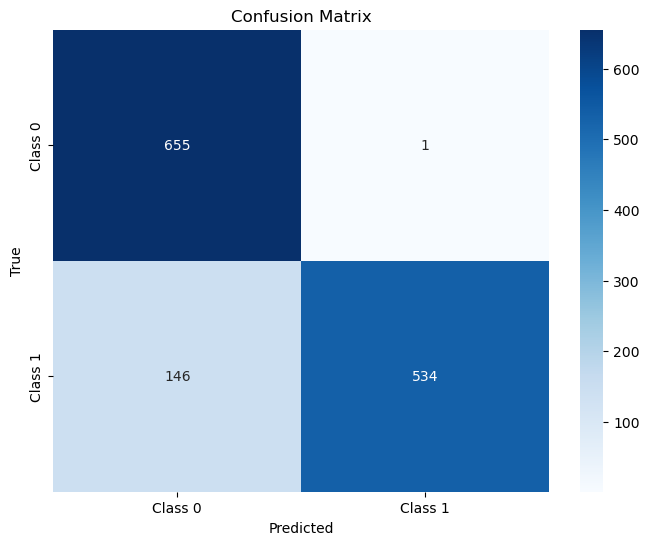

In [71]:
lr = LogisticRegression()

lr.fit(X_train_counts, y_train)

X_test_counts = vectorizer.transform(X_test)

y_pred = lr.predict(X_test_counts)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Data: {:.2f}%".format(accuracy * 100))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [72]:
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

# Calculate specificity and recall
specificity = true_negatives / (true_negatives + false_positives)
recall = true_positives / (true_positives + false_negatives)

# Print specificity and recall
print("Specificity: {:.2f}".format(specificity))
print("Recall: {:.2f}".format(recall))

Specificity: 1.00
Recall: 0.79


## Roc Curve

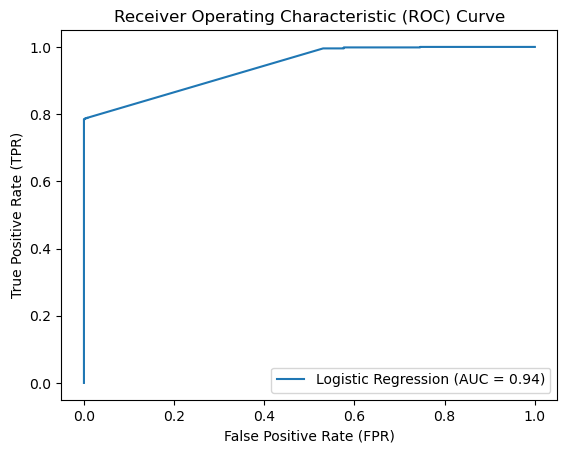

In [81]:
lr = LogisticRegression()

lr.fit(X_train_counts, y_train)

X_test_counts = vectorizer.transform(X_test)

y_pred = lr.predict(X_test_counts)

y_probs = lr.predict_proba(X_test_counts)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### (AUC) of 0.94 indicates that the model has a strong ability to discriminate between positive and negative instances

## Creating multiple models: MultinomialNB, LogisticRegression, RandomForest, KNeighborsClassifier, RF with GridSearchCV

In [44]:
# Train-Test-Split
X = final['Selftext']
y = final['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)


# Model 1
pipe_1 = Pipeline([
    ('cv', CountVectorizer(min_df=2)),
    ('mnb', MultinomialNB())
])

pipe_1.fit(X_train, y_train)
print(' Model 1 MNB '.center(40, '-'))
print(f'Train Score: \t{pipe_1.score(X_train, y_train):.4f}')
print(f'Test Score: \t{pipe_1.scbore(X_test, y_test):.4f}')
print('\n')

# Model 2
pipe_2 = Pipeline([
    ('cv', CountVectorizer(min_df=2)),
    ('logr', LogisticRegressionCV(solver='liblinear'))
])

pipe_2.fit(X_train, y_train)
print(' Model 2 Logr '.center(40, '-'))
print(f'Train Score: \t{pipe_2.score(X_train, y_train):.4f}')
print(f'Test Score: \t{pipe_2.score(X_test, y_test):.4f}')
print('\n')

# Model 3
pipe_3 = Pipeline([
    ('cv', CountVectorizer(min_df=2)),
    ('rf', RandomForestClassifier())
])

pipe_3.fit(X_train, y_train)
print(' Model 3 RandomForest '.center(40, '-'))
print(f'Train Score: \t{pipe_3.score(X_train, y_train):.4f}')
print(f'Test Score: \t{pipe_3.score(X_test, y_test):.4f}')
print('\n')


# Model 4
pipe_4 = Pipeline([
    ('cv', CountVectorizer(min_df=2)),
    ('knn', KNeighborsClassifier())
])

pipe_4.fit(X_train, y_train)
print(' Model 4 KNN '.center(40, '-'))
print(f'Train Score: \t{pipe_4.score(X_train, y_train):.4f}')
print(f'Test Score: \t{pipe_4.score(X_test, y_test):.4f}')
print('\n')


# Model 5
pipe_5 = Pipeline([
    ('cv', CountVectorizer(min_df=2)),
    ('rf', RandomForestClassifier())
])

params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
    'rf__max_features': ['sqrt', 0.5]
}

grid = GridSearchCV(pipe_5, param_grid=params, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)
print(' Model 5 RandomForest Grid '.center(40, '-'))
print(f'Parameter: \t{grid.best_params_}')
print(f'Train Score: \t{grid.score(X_train, y_train):.4f}')
print(f'Test Score: \t{grid.score(X_test, y_test):.4f}')
print('\n')

------------- Model 1 MNB --------------
Train Score: 	0.8790
Test Score: 	0.8671


------------- Model 2 Logr -------------
Train Score: 	0.8890
Test Score: 	0.8784


--------- Model 3 RandomForest ---------
Train Score: 	0.8890
Test Score: 	0.8743


------------- Model 4 KNN --------------
Train Score: 	0.8491
Test Score: 	0.7880


------ Model 5 RandomForest Grid -------
Parameter: 	{'rf__max_depth': None, 'rf__max_features': 0.5, 'rf__n_estimators': 150}
Train Score: 	0.8890
Test Score: 	0.8772




Multinomial NB: model is performing reasonably well on both the training and testing datasets. It's a simple probabilistic classifier that works well with text data, but it might not capture more complex relationships.

Logistic Regression: Best-fitting line to separate the classes. This model performed slightly better than the MNB in terms of testing accuracy.

KNN: In this case, it seems to be performing worse compared to the other models, indicating that the data might not be well-suited for this algorithm

Random Forest Classifier with Grid Search: Optimized version of the Random Forest model using hyperparameter tuning through a grid search. It achieved a training accuracy of 88.90% and a testing accuracy of 87.72%. The hyperparameters have been tuned to improve the model's performance, resulting in accuracy close to the original Random Forest model.

#### Our models seem to be performing very well, so lets try to make it more interesting for our prediction by removing the top superhero names from each Subreddit

### Would the model be able to predict which Subbreddit by removing top superhero names from the equation.

Since we know the top words and bi-grams from each subbreddit we can use those to remove

In [74]:
superhero_names = [
    'secret invasion', 'captain america', 'iron man', 'captain marvel', 'spider man',
    'justice league', 'civil war', 'don know', 'nick fury', 'earth 616',
    'feel like', 'ant man', 'green lantern', 'black panther', 'shang chi',
    'doctor strange', 'secret wars', 'infinity war', 'moon knight', 'agents shield',
    'black widow', 'winter soldier', 'wonder woman', 'guardians galaxy',
    'don think', 'post credit', 'new world', 'multiverse saga', 'tony stark',
    'love thunder', 'armor wars', 'marvel studios', 'make sense', 'super skrull',
    'multiverse madness', 'lot people', 'felt like', 'way home', 'pjpgauto webps',
    'jpg width', 'credit scene', 'feels like', 'makes sense', 'bruce wayne',
    'scarlet witch', 'harley quinn', 'view poll', 'shows movies', 'man wasp',
    'war machine', "Justice League", "Green Lantern", "Wonder Woman", "justice league", 
    "want read", "feel like", "reading comics", "League Season", 
    "just finished", "reading order"
]

# Remove rows with the top superhero names from the 'Selftext' column
final['Selftext'] = final['Selftext'].apply(lambda text: ' '.join(word for word in text.split() if word.lower() not in superhero_names))

X = final['Selftext']
y = final['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8885
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       656
           1       1.00      0.78      0.88       680

    accuracy                           0.89      1336
   macro avg       0.91      0.89      0.89      1336
weighted avg       0.91      0.89      0.89      1336



### Bi-Gram seemed to provide the most insight into our subbreddits so I will exapnd more to possibly get more insight

In [85]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

matrix = vectorizer.fit_transform(final['Selftext'])

vocab = vectorizer.get_feature_names_out()

bi_counts = matrix.sum(axis=0)

bigram_df = pd.DataFrame({
    'Bigram': vocab,
    'Count': bi_counts.flat
})

bigram_df_sorted = bigram_df.sort_values(by='Count', ascending=False)

print(bigram_df_sorted.head(50))

                   Bigram  Count
50354     secret invasion    851
7131      captain america    343
28550            iron man    322
7138       captain marvel    263
53789          spider man    257
29801      justice league    237
8704            civil war    221
14791            don know    212
39446           nick fury    203
15372           earth 616    195
19141           feel like    190
2460              ant man    187
23622       green lantern    185
5607        black panther    181
51325           shang chi    173
14411      doctor strange    169
50375         secret wars    162
27513        infinity war    157
37779         moon knight    145
1674        agents shield    142
5611          black widow    140
64577      winter soldier    136
64840        wonder woman    131
23808    guardians galaxy    123
14844           don think    121
43306         post credit    116
39366           new world    107
38517     multiverse saga    106
59793          tony stark    102
34201     

### Show the next set of bi-grams. 
### How would removing these common phrases affect our prediction model and displaying the next set of words.

In [98]:
bigram_words_to_remove = [
    'secret invasion', 'captain america', 'iron man', 'captain marvel', 'spider man',
    'justice league', 'civil war', 'don know', 'nick fury', 'earth 616',
    'feel like', 'ant man', 'green lantern', 'black panther', 'shang chi',
    'doctor strange', 'secret wars', 'infinity war', 'moon knight', 'agents shield',
    'black widow', 'winter soldier', 'wonder woman', 'guardians galaxy',
    'don think', 'post credit', 'new world', 'multiverse saga', 'tony stark',
    'love thunder', 'armor wars', 'marvel studios', 'make sense', 'super skrull',
    'multiverse madness', 'lot people', 'felt like', 'way home', 'pjpgauto webps',
    'jpg width', 'credit scene', 'feels like', 'makes sense', 'bruce wayne',
    'scarlet witch', 'harley quinn', 'view poll', 'shows movies', 'man wasp',
    'war machine'
]

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

matrix = vectorizer.fit_transform(final['Selftext'])

vocab = vectorizer.get_feature_names_out()

bi_counts = matrix.sum(axis=0)
bigram_df = pd.DataFrame({
    'Bigram': vocab,
    'Count': bi_counts.flat
})

bigram_df_filtered = bigram_df[~bigram_df['Bigram'].isin(bigram_words_to_remove)]

bigram_df_sorted = bigram_df_filtered.sort_values(by='Count', ascending=False)

print(bigram_df_sorted.head(50))

                    Bigram  Count
29426        just finished     68
9341            comic book     68
51476        shield season     67
18391        falcon winter     67
38372         movies shows     65
6249             brave new     64
29511            just like     64
33648            long time     63
14855             don want     63
2346       animated series     61
14245         disney shows     60
48122        rhodey skrull     60
27509        infinity saga     60
65867            years ago     59
41560          people just     59
42872        pngauto webps     59
35304           maria hill     59
42871            png width     59
28948        jessica jones     59
29889         kang dynasty     58
58554            thor love     58
61688           utm source     57
53533      source shareutm     57
51388      shareutm medium     57
35570        marvel movies     57
14230          disney plus     56
62544      wakanda forever     56
8900          cloak dagger     55
24006         

## Creating a new prediction model with the bigram words removed

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [69]:
bigram_words_to_remove = [
    'secret invasion', 'captain america', 'iron man', 'captain marvel', 'spider man',
    'justice league', 'civil war', 'don know', 'nick fury', 'earth 616',
    'feel like', 'ant man', 'green lantern', 'black panther', 'shang chi',
    'doctor strange', 'secret wars', 'infinity war', 'moon knight', 'agents shield',
    'black widow', 'winter soldier', 'wonder woman', 'guardians galaxy',
    'don think', 'post credit', 'new world', 'multiverse saga', 'tony stark',
    'love thunder', 'armor wars', 'marvel studios', 'make sense', 'super skrull',
    'multiverse madness', 'lot people', 'felt like', 'way home', 'pjpgauto webps',
    'jpg width', 'credit scene', 'feels like', 'makes sense', 'bruce wayne',
    'scarlet witch', 'harley quinn', 'view poll', 'shows movies', 'man wasp',
    'war machine'
]

final['Selftext'] = final['Selftext'].apply(
    lambda text: ' '.join(bigram for bigram in text.split() if bigram.lower() not in bigram_words_to_remove)
)

X = final['Selftext']
y = final['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()

model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       656
           1       1.00      0.78      0.88       680

    accuracy                           0.89      1336
   macro avg       0.91      0.89      0.89      1336
weighted avg       0.91      0.89      0.89      1336



Even after eliminating the most prominent bi-gram words and superhero names from the dataset, the model continues to exhibit a robust level of accuracy in predicting the designated target. This outcome underscores the model's resilience and capability to generalize its predictive power beyond the most dominant linguistic features and terms

### Running Sentiment Analysis on Each Subreddit to Determine Positive Sentiment

In [62]:
ms = pd.read_csv('combined_MS.csv')

In [63]:
dc = pd.read_csv('combined_DC.csv')

In [71]:
ms.dropna(subset=['Selftext'], inplace=True)
dc.dropna(subset=['Selftext'], inplace=True)

In [72]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [73]:
ms['sentiment'] = ms['Selftext'].apply(get_sentiment)
dc['sentiment'] = dc['Selftext'].apply(get_sentiment)

In [74]:
ms_avg_sentiment = ms['sentiment'].mean()
dc_avg_sentiment = dc['sentiment'].mean()

print(f"Average sentiment polarity for MS subreddit: {ms_avg_sentiment}")
print(f"Average sentiment polarity for DC subreddit: {dc_avg_sentiment}")

Average sentiment polarity for MS subreddit: 0.08172666381067456
Average sentiment polarity for DC subreddit: 0.10581706025033777


In [75]:
if ms_avg_sentiment > dc_avg_sentiment:
    print("The MS subreddit has more positive mentions.")
elif ms_avg_sentiment < dc_avg_sentiment:
    print("The DC subreddit has more positive mentions.")
else:
    print("Both subreddits have similar average sentiment polarities.")

The DC subreddit has more positive mentions.


#### 1 indicates a strongly negative sentiment
#### 0 indicates a neutral sentiment
#### +1 indicates a strongly positive sentiment
#### In this case, the sentiment polarity scores are:

#### Average sentiment polarity for MS subreddit: 0.0817 (Slightly positive)
#### Average sentiment polarity for DC subreddit: 0.1058 (Slightly positive)
#### Both subreddits have slightly positive sentiment, but the DC subreddit has a slightly higher average sentiment ### polarity compared to the MS subreddit. Although Marvel having more engagement should be taken into consideration

In [80]:
from nltk.sentiment import SentimentIntensityAnalyzer

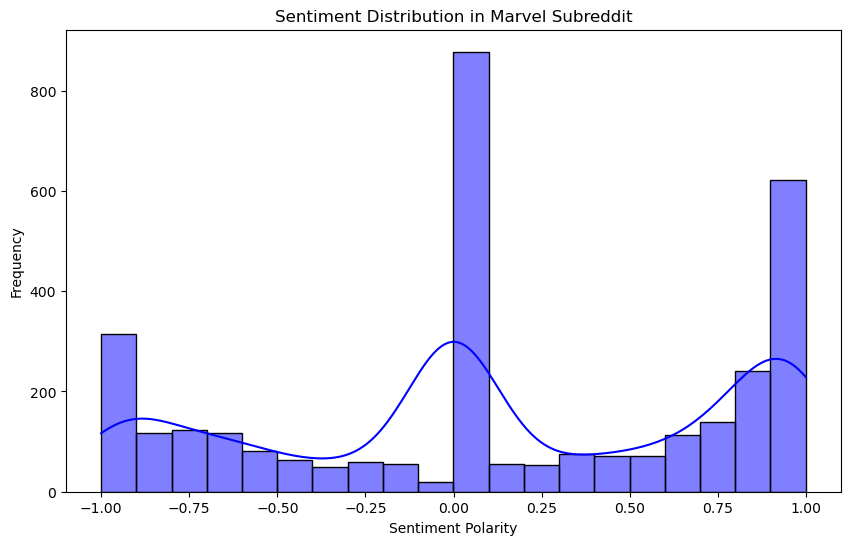

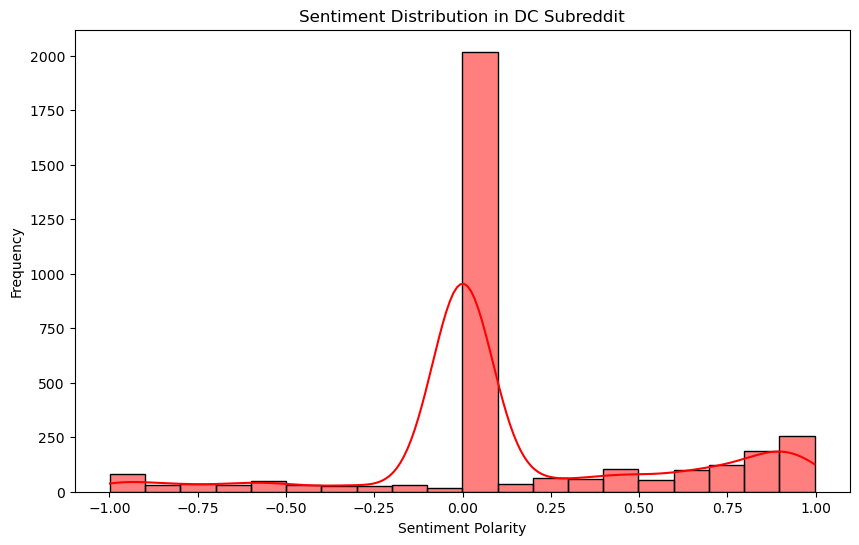

In [93]:
sia = SentimentIntensityAnalyzer()

# Sentiment polarity analysis 
ms['Sentiment_Polarity'] = ms['Selftext'].apply(lambda text: sia.polarity_scores(str(text))['compound'])
dc['Sentiment_Polarity'] = dc['Selftext'].apply(lambda text: sia.polarity_scores(str(text))['compound'])

plt.figure(figsize=(10, 6))
sns.histplot(data=ms, x='Sentiment_Polarity', bins=20, kde=True, color='blue')  # Set color to blue
plt.title('Sentiment Distribution in Marvel Subreddit')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dc, x='Sentiment_Polarity', bins=20, kde=True, color='red')  # Set color to green
plt.title('Sentiment Distribution in DC Subreddit')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## Conclusions

In conclusion, a consistent observation arising from the analysis of posts across both subreddits is the prevalence of discussions surrounding Marvel superheroes in comparison to DC superheroes. Furthermore, Marvel's iconic characters hold greater recognition than DC's except for Superman and Batman. The model's ability to maintain a high level of predictive accuracy even after eliminating dominant bi-grams and superhero names reflects its robustness in capturing meaningful patterns beyond surface-level linguistic features.

Both subreddits exhibited slightly positive sentiment, with the DC subreddit showing a slightly higher average sentiment polarity compared to the Marvel subreddit. However, it's important to account for Marvel's greater engagement levels, which may influence sentiment scores. This investigation underscores the intricate dynamics of these online communities and provides valuable insights into user preferences, linguistic nuances, and sentiment tendencies within the context of the Marvel and DC universes. 





Marvel and DC could potentially leverage the insights derived from analyzing forums like subreddits to gain a deeper understanding of ongoing discussions and prevalent sentiments related to their respective shows. This approach holds promise for both companies to stay attuned to audience preferences and tailor their strategies more effectively.